# Inference and Hypothesis Testing

**OBJECTIVES**

- Review confidence intervals
- Review standard error of the mean
- Introduce Hypothesis Testing
 - Hypothesis test with one sample
 - Difference in two samples
 - Difference in multiple samples

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [28]:
#read in the polls data
polls = pd.read_csv('data/polls.csv')

In [29]:
#take a peek
polls.head()

,p1,p2,p3,p4,p5
0,5,1,3,5,2
1,1,3,5,5,5
2,2,3,5,3,5
3,4,3,3,3,5
4,5,4,3,2,2


### Confidence intervals

$$\mu \pm t_{1 - \alpha / 2} \times \frac{s}{\sqrt{n}}$$

- $\alpha$: significance level -- we determine this
- *t*: t-score -- we look this up
- $\mu$: we get this from the data
- $s$: we get this from the data **NOTE**: This is different than a population standard deviation.

In [30]:
#examine the first question data
q1 = polls['p1']

In [31]:
#determine degrees of freedom
#i.e. length - 1
dof = len(q1) - 1

In [35]:
#look up test statistic
#we need our alpha and dof
#where do we bound 97.5% of our data
t_stat = stats.t.ppf(1 - 0.05/2, dof)

In [36]:
#compute sample standard deviation
s = np.std(q1, ddof = 1)

In [37]:
#sample size
n = len(q1)

In [40]:
#compute upper limit
upper = q1.mean() + t_stat*s/np.sqrt(n)

In [41]:
#compute the lower bound
lower = q1.mean() - t_stat*s/np.sqrt(n)

In [42]:
#print it
(lower, upper)

(3.8507428278573816, 4.215923838809285)

In [44]:
#use scipy
#1 - alpha
#dof
#sem
#(1 - alpha, dof, mean, sem)
stats.t.interval(.95, n - 1, np.mean(q1), stats.sem(q1))

(3.8507428278573816, 4.215923838809285)

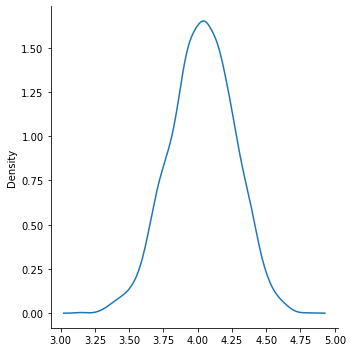

In [62]:
#plot it
#take 500 samples of size 7 from poll 1, find mean, kde of the results
sample_means = [q1.sample(20).mean() for _ in range(5000)]
sns.displot(sample_means, kind = 'kde')

### Problem

- Find the 95% confidence interval for the second poll
- Compare the two intervals, is there much overlap?  What does this mean?

In [65]:
q2 = polls['p2']
stats.t.interval(.99,n-1,np.mean(q2),stats.sem(q2))

(3.133932119831526, 3.6794012135018073)

In [66]:
stats.t.interval(.99, n - 1, np.mean(q1), stats.sem(q1))

(3.7922315796186616, 4.274435087048005)

### Confidence interval for Difference in Means

In [67]:
#statsmodels imports
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

In [68]:
#create our objects polls are DescrStatsWeights
#compare means of these
dq1 = DescrStatsW(q1)
dq2 = DescrStatsW(q2)
c = CompareMeans(dq1, dq2)

In [69]:
#90% confidence interval -- represents the difference between 
c.tconfint_diff(.05)

(0.3521083067086064, 0.9012250266247266)

In [ ]:
#so what?

### Jobs Data

The data below is a sample of job postings from New York City.  We want to investigate the lower and upper bound columns.

In [70]:
#read in the data
jobs = pd.read_csv('data/jobs.csv')

In [71]:
#salary from
jobs.head()

,job_id,title,agency,posting_date,salary_from,salary_to
0,378085,HVAC Service Technic,DEPT OF HEALTH/MENTAL HYGIENE,2018-12-21,385.0,385.0
1,377919,"Psychologist, Level",POLICE DEPARTMENT,2018-12-31,62458.0,81131.0
2,379321,Asset Manager,HOUSING PRESERVATION & DVLPMNT,2019-01-07,52524.0,60000.0
3,378658,Public Health Adviso,DEPT OF HEALTH/MENTAL HYGIENE,2019-01-02,37957.0,47142.0
4,321570,"Deputy Commissioner,",DEPT OF ENVIRONMENT PROTECTION,2018-01-26,209585.0,209585.0


### Margin of Error

Now, the question is to build a confidence interval that achieves a given amount of error.

$$error = z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

**PROBLEM**

What is the minimum sample size necessary to estimate the upper salary range with 95% confidence within \$3000?

- need $z$-score: 1.96
- E: 3000
- $\sigma$: `np.std(jobs['salary_to'])`

In [ ]:
#do the computation


In [ ]:
#repeat for $500


### Testing Significance

Now that we've tackled confidence intervals, let's wrap up with a final test for significance.  With a Hypothesis Test, the first step is declaring a null and alternative hypothesis.  Typically, this will be an assumption of no difference.

$$H_0: \text{Null Hypothesis}$$
$$H_a: \text{Alternative Hypothesis}$$

For example, our data below have to do with a reading intervention and assessment after the fact.  Our null hypothesis will be:

$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [72]:
#read in the data
reading = pd.read_csv('data/DRP.csv')
reading.head()

,id,group,g,drp
0,1,Treat,0,24
1,2,Treat,0,56
2,3,Treat,0,43
3,4,Treat,0,59
4,5,Treat,0,58


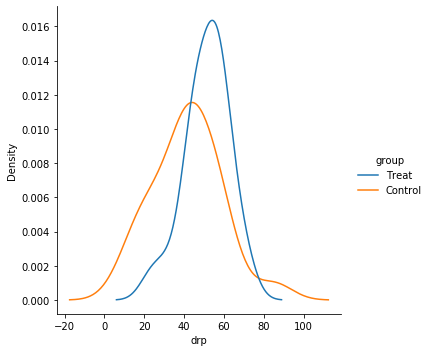

In [73]:
#distributions of groups
sns.displot(x = 'drp', hue = 'group', data = reading, kind='kde')

For our hypothesis test, we need two things:

- Null and alternative hypothesis

$$H_0: \mu_t = \mu_c $$
$$H_a: \mu_t \neq \mu_c $$
- Significance Level

 - $\alpha = 0.05$
Just like before, we will set a tolerance for rejecting the null hypothesis.

In [75]:
#split the groups
treatment = reading.loc[reading['g'] == 0]['drp']
control = reading.loc[reading['g'] == 1]['drp']

In [76]:
#run the test
stats.ttest_ind(treatment, control)

Ttest_indResult(statistic=2.2665515995859433, pvalue=0.02862948283224572)

In [ ]:
#alpha at 0.05

SUPPOSE WE WANT TO TEST IF INTERVENTION MADE SCORES HIGHER

$$H_0: \mu_0 = \mu_1$$
$$H_1: \mu_0 < \mu_1$$

In [ ]:
#alpha at 0.05

In [77]:
t_score, p = stats.ttest_ind(treatment, control)

In [78]:
p/2

0.01431474141612286

**PROBLEMS**

1. Given the `mileage` dataset, test the claim on the cars sticker that the average mpg for city driving is 30 mpg.

2. If we increase our food intake, we generally gain weight.  In one study, researchers fed 16 non-obese adults, age 25-36 1000 excess calories a day.  According to theory, 3500 extra calories will translate into a weight gain of 1 point, therefore we expect each of the subjects to gain 16 pounds.  the `wtgain` dataset contains the before and after eight week period gains.

  - Create a new column to represent the weight change of each subject.
  - Find the mean and standard deviation for the change.
  - Determine the 95% confidence interval for weight change and interpret in complete sentences.
  - Test the null hypothesis that the mean weight gain is 16 lbs.  What do you conclude?
  
3. Insurance adjusters are concerned about the high estimates they are receiving from Jocko's Garage.  To see if the estimates are unreasonably high, each of 10 damaged cars was take to Jocko's and to another garage and the estimates were recorded in the `jocko.csv` file.  

  - Create a new column that represents the difference in prices from the two garages. Find the mean and standard deviation of the difference.
  - Test the null hypothesis that there is no difference between the estimates at the 0.05 significance level.

In [79]:
cars = pd.read_csv('data/JOCKO.csv')

In [80]:
cars.head()

,Car,Jocko,Other
0,1,1410,1250
1,2,1550,1300
2,3,1250,1250
3,4,1300,1200
4,5,900,950


In [81]:
cars['difference'] = cars['Jocko'] - cars['Other']

In [82]:
cars['difference'].mean()

114.0

In [83]:
cars['difference'].std()

114.40182593725407

In [84]:
#NULL HYPOTHESIS IS ------- There is no difference in average price

In [85]:
stats.ttest_ind(cars['Jocko'], cars['Other'])

Ttest_indResult(statistic=0.32060397670781055, pvalue=0.7522026578824064)

In [86]:
#make two groups that are different
#group 1 norm -- mean of 100 sd of 3
#group 2 norm -- mean of 80 sd of 3

In [103]:
g1 = np.random.normal(loc = 100, scale = 3, size = 100)
g2 = np.random.normal(loc = 95, scale = 3, size = 100)

In [104]:
#ALPHA = 0.05
stats.ttest_ind(g1, g2)

Ttest_indResult(statistic=13.58343188229512, pvalue=3.956675849806127e-30)